# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayes' Theorem



In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [3]:
p_a = 0.7
p_b = 0.5
p_b_given_a = 0.4

In [4]:
ans1 = p_a * p_b
print('P(AandB) if A and B are independent:', ans1)

ans12 = p_a * p_b_given_a
print('P(AandB) if A and B are dependent:', ans12)


ans2 = (p_b_given_a * p_a) / p_b
print('P(A|B):', ans2)


P(AandB) if A and B are independent: 0.35
P(AandB) if A and B are dependent: 0.27999999999999997
P(A|B): 0.5599999999999999


### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [6]:
ans1 = 8/52
print('P(drawing a King or Queen):', ans1)

P(drawing a King or Queen): 0.15384615384615385


In [7]:
import math
def combination(n,k):
    combin = math.factorial(n)/(math.factorial(n-k)*math.factorial(k))
    return combin

In [8]:
ans2 = combination(52,5)
print('Number of possible 5 card combinations:', ans2)

Number of possible 5 card combinations: 2598960.0


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [9]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [12]:
# your code here 
p = 12/52
print('P(of winning a point):', p)

P(of winning a point): 0.23076923076923078


1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [13]:
# your code here 
ans1 = probability_of_scoring_k(22, p, 8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [20]:
# your code here
probabilities = []
for i in range(23):
    probabilities.append(probability_of_scoring_k(22, 12/52, i))
probabilities

[0.003113481211226729,
 0.020548975994096417,
 0.06472927438140372,
 0.12945854876280743,
 0.18447843198700062,
 0.1992367065459607,
 0.16935120056406663,
 0.1161265375296457,
 0.06532117736042573,
 0.03048321610153201,
 0.011888454279597485,
 0.0038907668551409957,
 0.001069960885163774,
 0.0002469140504224094,
 4.761913829575039e-05,
 7.619062127320063e-06,
 1.0000019042107584e-06,
 1.0588255456349209e-07,
 8.823546213624342e-09,
 5.57276602965748e-10,
 2.5077447133458666e-11,
 7.164984895273905e-13,
 9.770433948100781e-15]

1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

In [21]:
k_values = []
for i in range(23):
    k_values.append(i)

k_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

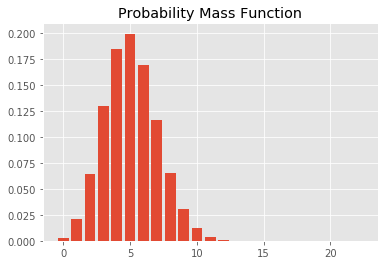

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar(k_values, probabilities);
plt.title("Probability Mass Function");

In [30]:
type_of_distribution = 'The distribution has a right/positive skew.'
type_of_distribution

'The distribution has a right/positive skew.'

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [54]:
def z_score(check_amt):
    z_s = (check_amt - 20) / 2
    return z_s

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [56]:
check_amt = 24
z_score(check_amt)

2.0

In [37]:
# The empirical rule states that 68% of the distribution will be within
# one standard deviation of the mean, 95% of the distribution will be 
# within 2 standard deviations of the mean, and 99.7% of the distribution
# will be within 3 standard deviations of the mean. 

# A z-score of positive 2 corresponds with the 95% of the distribution
# within 2 standard deviations of the mean.

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf) but you can also use some libraries available in python.

In [57]:
check_amt = 25
z_score(check_amt)

2.5

In [60]:
import math
import scipy.stats as stats
p = 1 - stats.norm.cdf(2.5)
p

0.006209665325776159

In [39]:
# A $25 check has a z-score of 2.5, which produces a p-value of 0.0062. 
# The p-value is less than the 0.05 alpha level, which means we can 
# reject the null hypothesis and say that the $25 check is 
# siginificantly greater than the mean.

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [ ]:
# 

RAN OUT OF TIME ON THIS ONE




In [41]:
# this interval will contain, 95% of the time, the true population mean 
# 1 time out of 20 it will not contain the true population mean

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu$ of the population mean?

In [42]:
# The Central Limit Theorem states that when you take large enough
# random samples from a population (with replacement), then the 
# samples' distributions will be approximately normally distributed.

# And for the random samples taken from the population, it can be
# infered their mean is equal to the population mean. 

# It can also be infered that the standard deviation of sample means is
# equal to the population mean divided by the square root 
# of the sample size (n).

## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

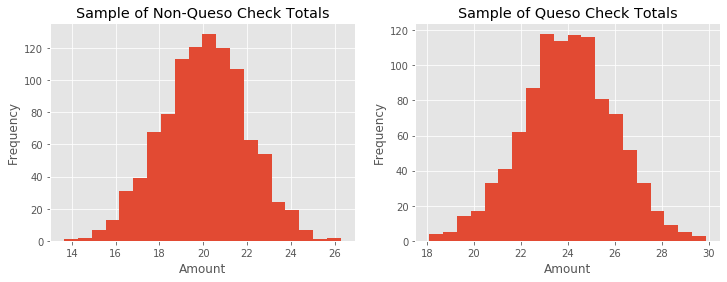

In [31]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [36]:
h_null = 'customers who order queso spend the same as customers who do not order queso (mean(not queso) = mean(queso))'
print('Null Hypothesis:', h_null)
h_alt = 'customers who order queso spend more than the customers who do not order queso (mean(not queso) < mean(queso))'
print('Alternative Hypothesis:', h_alt)

Null Hypothesis: customers who order queso spend the same as customers who do not order queso (mean(not queso) = mean(queso))
Alternative Hypothesis: customers who order queso spend more than the customers who do not order queso (mean(not queso) < mean(queso))


3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [45]:
# Type 1 errors are false positives, so in this context that would mean
# we observed a statistically significant difference between the means,
# suggesting there is enough evidence to support that the queso mean is
# greater than the not queso mean, but the null hypothesis was true and 
# we should not have rejected it. There in fact was not a statistical
# difference.

# Type 2 error is a false negative, so in this context we failed to 
# reject the null hypothesis because we did not have sufficient evidence
# to say that there was a statistically significant difference between 
# the means, when in fact the null hypothesis was false and we should
# have rejected the null for a significant differences between the queso
# and not queso mean.

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [39]:
print('queso mean:', queso.mean())
print('no-queso mean:', no_queso.mean())

queso mean: 23.992814607054243
no-queso mean: 20.047532509358607


In [41]:
import scipy
import scipy.stats
from scipy.stats import stats

In [47]:
welch_ttest = scipy.stats.ttest_ind(queso, no_queso)
welch_ttest

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [48]:
#divided by 2 for 1 way test
welch_ttest.pvalue/2

6.48354835462555e-308

In [47]:
# we can reject the null hypothesis 
# because the pvalue is less than alpha 
# which means that there is sufficient evidenct to suggest a
# statistically significant difference between the two means
# and since I did a one-tail test, we can assert that the 
# queso mean is greater than the no-queso mean because the
# ttest_indResult statistic is positive

## Part 4: Bayes' Theorem [Suggested time: 15 minutes]

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [29]:
ans1 = (0.6*0.2) + (0.1*0.8)
print('P(getting a small puppy):', ans1)

ans2 = (0.1*0.2) / (0.1*0.2 + 0.55*0.8)
print('P(went to pet store given got a large puppy):', ans2)

ans3a = (0.6*0.2) / ans1
print('P(went to pet store | picked small puppy):', ans3a)

ans3b = (0.1*0.8) / ans1
print('P(went to pound given picked small puppy):', ans3b)

ans3 = "more likely Thomas went to the pet store"
print(ans3)

ans4_prior = "P(went to pet store)"
print('Prior:', ans4_prior)
ans4_posterior = "P(went to pet store given got a large puppy)"
print('Posterior:', ans4_posterior)
ans4_likelihood = "P(got a large puppy given went to pet store)"
print('Likelihood:', ans4_likelihood)

P(getting a small puppy): 0.2
P(went to pet store given got a large puppy): 0.043478260869565216
P(went to pet store | picked small puppy): 0.6
P(went to pound given picked small puppy): 0.4000000000000001
more likely Thomas went to the pet store
Prior: P(went to pet store)
Posterior: P(went to pet store given got a large puppy)
Likelihood: P(got a large puppy given went to pet store)
